In [2]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

In [3]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
HTML("""<style>
h1 {
  font-family: 'Permanent Marker', cursive;
  text-align: center;
  color: red;
  
}
ol {
  list-style-position: inside;
  margin-left: 1em;
  list-style-position: outside;
}
h2 {
  font-family: 'Permanent Marker', cursive;
  color: blue;
}
h3 {
  font-family: 'Permanent Marker', cursive;

}
</style>""")

# TD_10_2 - Parcours de graphes

Ce cours est une version "jupyter notebook" du [cours proposé par Stéphan Van Zuijlen](http://isn-icn-ljm.pagesperso-orange.fr/NSI-TLE/co/section_chapitre3.html)

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
from networkx.drawing.nx_agraph import to_agraph 
import matplotlib.image as mpimg
%matplotlib notebook

## La méthode BFS (Breadth First Search) ou parcours en largeur

Parcourir un graphe en largeur à partir d’un sommet, consiste à visiter le sommet puis ses enfants, puis les enfants de ses enfants... etc ...  
  
Pour cela, il faut utiliser une file et une liste pour marquer les sommets visités.  
  
Prenons en exemple le graphe ci-dessous:

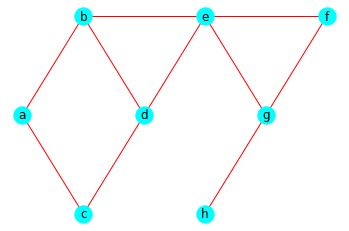

In [5]:
G = nx.DiGraph([("a","b"), ("a","c"), ("b","d"), ("c","d"),
                ("b","e"), ("d","e"), ("e","g"), ("e","f"),
                ("f","g"), ("g","h")])
G.nodes["a"]['pos'] = "0,10!"
G.nodes["b"]['pos'] = "10,20!"
G.nodes["c"]['pos'] = "10,0!"
G.nodes["d"]['pos'] = "20,10!"
G.nodes["e"]['pos'] = "30,20!"
G.nodes["f"]['pos'] = "50,20!"
G.nodes["g"]['pos'] = "40,10!"
G.nodes["h"]['pos'] = "30,0!"


pos = graphviz_layout(G)

plt.figure("cycle")
nx.draw_networkx_nodes(G, pos, node_color="cyan")
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows=False)
plt.box(False)
plt.show()

On dispose d’un graphe(G), d’une liste (sommet_visité) et d’une file(f).  
Le sommet de départ est par exemple ’b’, **on l’enfile**.  
Puis **tant que la file n’est pas vide**:  
* On **défile** f dans une variable par exemple tmp  
* **Si tmp n’est pas dans sommet_visité**  
  * On l’ajoute à sommet_visité
* **Pour chaque voisin de tmp**  
  * **S’il n’est ni dans sommet_visité ni dans la file**  
    * On **l’enfile**
* On renvoie sommet_visité  
  
Voici les contenus des variables au premier tour de la boucle tant que:

#### Etape 1:  
```python
tmp = 'b'
sommet_visite = ['b']
file = ['a', 'd', 'e'] # tete en 0
```

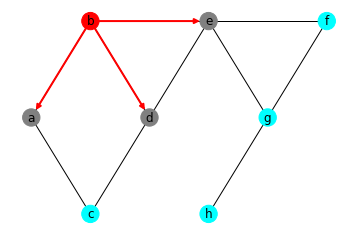

In [6]:
G.nodes["a"]['pos'] = "0,10!"
G.nodes["b"]['pos'] = "10,20!"
G.nodes["c"]['pos'] = "10,0!"
G.nodes["d"]['pos'] = "20,10!"
G.nodes["e"]['pos'] = "30,20!"
G.nodes["f"]['pos'] = "50,20!"
G.nodes["g"]['pos'] = "40,10!"
G.nodes["h"]['pos'] = "30,0!"


pos = graphviz_layout(G)
color_map = []

for node in G:
    if node in ['b']:
        color_map.append('red')
    elif node in ['a','e','d']: 
        color_map.append('gray')
    else:
        color_map.append('cyan')


plt.figure("cycle2")
H = nx.DiGraph([("b","a"), ("b","d"), ("b","e")])

nx.draw_networkx_nodes(G, pos, node_color=color_map)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='black', arrows=False)
nx.draw_networkx_edges(H, pos, edge_color='r',width=2,arrows=True)

plt.box(False)
plt.show()

#### Etape 2:  
```python
tmp = 'a'
sommet_visite = ['b', 'a']
file = ['d', 'e', 'c'] # tete en 0
```

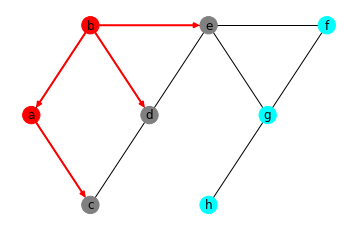

In [7]:
G.nodes["a"]['pos'] = "0,10!"
G.nodes["b"]['pos'] = "10,20!"
G.nodes["c"]['pos'] = "10,0!"
G.nodes["d"]['pos'] = "20,10!"
G.nodes["e"]['pos'] = "30,20!"
G.nodes["f"]['pos'] = "50,20!"
G.nodes["g"]['pos'] = "40,10!"
G.nodes["h"]['pos'] = "30,0!"


pos = graphviz_layout(G)
color_map = []

for node in G:
    if node in ['b',"a"]:
        color_map.append('red')
    elif node in ['c','e','d']: 
        color_map.append('gray')
    else:
        color_map.append('cyan')


plt.figure("cycle2")
H = nx.DiGraph([("b","a"), ("b","d"), ("b","e"),("a","c")])

nx.draw_networkx_nodes(G, pos, node_color=color_map)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='black', arrows=False)
nx.draw_networkx_edges(H, pos, edge_color='r',width=2,arrows=True)

plt.box(False)
plt.show()

### Exercice 1:  
Compléter les contenus des variables tmp, sommet_visite et file aux tours suivants

#### Etape 3:  
```python
tmp = ....
sommet_visite = ....
file = ....
```

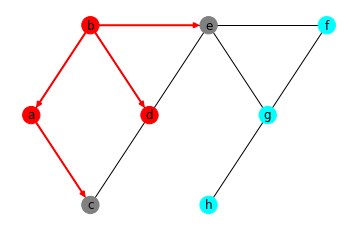

In [8]:
G.nodes["a"]['pos'] = "0,10!"
G.nodes["b"]['pos'] = "10,20!"
G.nodes["c"]['pos'] = "10,0!"
G.nodes["d"]['pos'] = "20,10!"
G.nodes["e"]['pos'] = "30,20!"
G.nodes["f"]['pos'] = "50,20!"
G.nodes["g"]['pos'] = "40,10!"
G.nodes["h"]['pos'] = "30,0!"


pos = graphviz_layout(G)
color_map = []

for node in G:
    if node in ['b',"a",'d']:
        color_map.append('red')
    elif node in ['c','e']: 
        color_map.append('gray')
    else:
        color_map.append('cyan')


plt.figure("cycle2")
H = nx.DiGraph([("b","a"), ("b","d"), ("b","e"),("a","c")])

nx.draw_networkx_nodes(G, pos, node_color=color_map)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='black', arrows=False)
nx.draw_networkx_edges(H, pos, edge_color='r',width=2,arrows=True)

plt.box(False)
plt.show()

#### Etape 4:  
```python
tmp = ....
sommet_visite = ....
file = ....
```

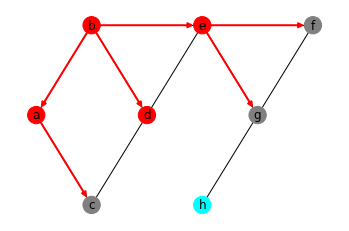

In [9]:
G.nodes["a"]['pos'] = "0,10!"
G.nodes["b"]['pos'] = "10,20!"
G.nodes["c"]['pos'] = "10,0!"
G.nodes["d"]['pos'] = "20,10!"
G.nodes["e"]['pos'] = "30,20!"
G.nodes["f"]['pos'] = "50,20!"
G.nodes["g"]['pos'] = "40,10!"
G.nodes["h"]['pos'] = "30,0!"


pos = graphviz_layout(G)
color_map = []

for node in G:
    if node in ['b',"a",'d','e']:
        color_map.append('red')
    elif node in ['c','f','g']: 
        color_map.append('gray')
    else:
        color_map.append('cyan')


plt.figure("cycle2")
H = nx.DiGraph([("b","a"), ("b","d"), ("b","e"),("a","c"),
               ('e','f'),('e','g')])

nx.draw_networkx_nodes(G, pos, node_color=color_map)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='black', arrows=False)
nx.draw_networkx_edges(H, pos, edge_color='r',width=2,arrows=True)

plt.box(False)
plt.show()

#### Etape 5:  
```python
tmp = ....
sommet_visite = ....
file = ....
```

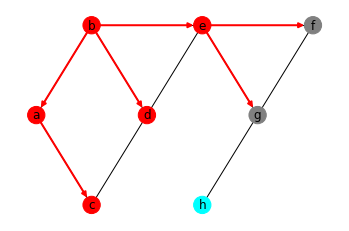

In [10]:
G.nodes["a"]['pos'] = "0,10!"
G.nodes["b"]['pos'] = "10,20!"
G.nodes["c"]['pos'] = "10,0!"
G.nodes["d"]['pos'] = "20,10!"
G.nodes["e"]['pos'] = "30,20!"
G.nodes["f"]['pos'] = "50,20!"
G.nodes["g"]['pos'] = "40,10!"
G.nodes["h"]['pos'] = "30,0!"


pos = graphviz_layout(G)
color_map = []

for node in G:
    if node in ['b',"a",'d','e','c']:
        color_map.append('red')
    elif node in ['f','g']: 
        color_map.append('gray')
    else:
        color_map.append('cyan')


plt.figure("cycle2")
H = nx.DiGraph([("b","a"), ("b","d"), ("b","e"),("a","c"),
               ('e','f'),('e','g')])

nx.draw_networkx_nodes(G, pos, node_color=color_map)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='black', arrows=False)
nx.draw_networkx_edges(H, pos, edge_color='r',width=2,arrows=True)

plt.box(False)
plt.show()

#### Etape 6:  
```python
tmp = ....
sommet_visite = ....
file = ....
```

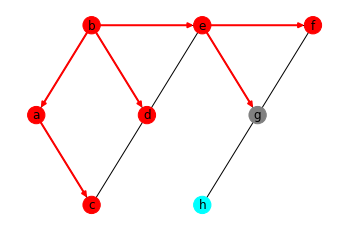

In [11]:
G.nodes["a"]['pos'] = "0,10!"
G.nodes["b"]['pos'] = "10,20!"
G.nodes["c"]['pos'] = "10,0!"
G.nodes["d"]['pos'] = "20,10!"
G.nodes["e"]['pos'] = "30,20!"
G.nodes["f"]['pos'] = "50,20!"
G.nodes["g"]['pos'] = "40,10!"
G.nodes["h"]['pos'] = "30,0!"


pos = graphviz_layout(G)
color_map = []

for node in G:
    if node in ['b',"a",'d','e','c','f']:
        color_map.append('red')
    elif node in ['g']: 
        color_map.append('gray')
    else:
        color_map.append('cyan')


plt.figure("cycle2")
H = nx.DiGraph([("b","a"), ("b","d"), ("b","e"),("a","c"),
               ('e','f'),('e','g')])

nx.draw_networkx_nodes(G, pos, node_color=color_map)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='black', arrows=False)
nx.draw_networkx_edges(H, pos, edge_color='r',width=2,arrows=True)

plt.box(False)
plt.show()

#### Etape 7:  
```python
tmp = ....
sommet_visite = ....
file = ....
```

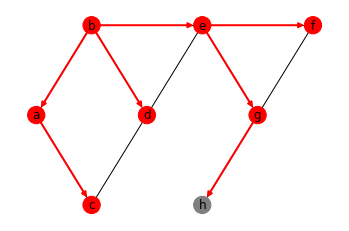

In [12]:
G.nodes["a"]['pos'] = "0,10!"
G.nodes["b"]['pos'] = "10,20!"
G.nodes["c"]['pos'] = "10,0!"
G.nodes["d"]['pos'] = "20,10!"
G.nodes["e"]['pos'] = "30,20!"
G.nodes["f"]['pos'] = "50,20!"
G.nodes["g"]['pos'] = "40,10!"
G.nodes["h"]['pos'] = "30,0!"


pos = graphviz_layout(G)
color_map = []

for node in G:
    if node in ['b',"a",'d','e','c','f','g']:
        color_map.append('red')
    elif node in ['h']: 
        color_map.append('gray')
    else:
        color_map.append('cyan')


plt.figure("cycle2")
H = nx.DiGraph([("b","a"), ("b","d"), ("b","e"),("a","c"),
               ('e','f'),('e','g'),('g','h')])

nx.draw_networkx_nodes(G, pos, node_color=color_map)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='black', arrows=False)
nx.draw_networkx_edges(H, pos, edge_color='r',width=2,arrows=True)

plt.box(False)
plt.show()

#### Etape 8:  
```python
tmp = ....
sommet_visite = ....
file = ....
```

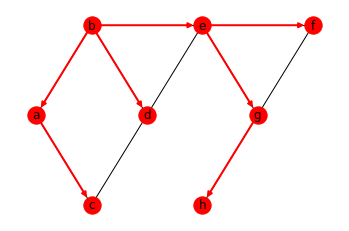

In [13]:
G.nodes["a"]['pos'] = "0,10!"
G.nodes["b"]['pos'] = "10,20!"
G.nodes["c"]['pos'] = "10,0!"
G.nodes["d"]['pos'] = "20,10!"
G.nodes["e"]['pos'] = "30,20!"
G.nodes["f"]['pos'] = "50,20!"
G.nodes["g"]['pos'] = "40,10!"
G.nodes["h"]['pos'] = "30,0!"


pos = graphviz_layout(G)



plt.figure("cycle2")
H = nx.DiGraph([("b","a"), ("b","d"), ("b","e"),("a","c"),
               ('e','f'),('e','g'),('g','h')])

nx.draw_networkx_nodes(G, pos, node_color='r')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='black', arrows=False)
nx.draw_networkx_edges(H, pos, edge_color='r',width=2,arrows=True)

plt.box(False)
plt.show()

Au final l'arborescence associée au parcours peut donc être modélisée de la façon suivante:
```python
['b', 'a', 'd', 'e', 'c', 'f', 'g', 'h']
```

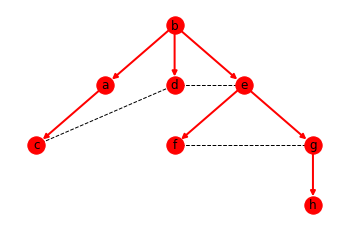

In [14]:
G = nx.DiGraph([("c","d"),("d","e"), ("f","g")])
G.add_node("a")
G.add_node("b")
G.add_node("h")

G.nodes["a"]['pos'] = "10,20!"
G.nodes["b"]['pos'] = "20,30!"
G.nodes["c"]['pos'] = "0,10!"
G.nodes["d"]['pos'] = "20,20!"
G.nodes["e"]['pos'] = "30,20!"
G.nodes["f"]['pos'] = "20,10!"
G.nodes["g"]['pos'] = "40,10!"
G.nodes["h"]['pos'] = "40,0!"


pos = graphviz_layout(G)
H = nx.DiGraph([("b","a"), ("b","d"), ("b","e"),("a","c"),
               ('e','f'),('e','g'),('g','h')])

plt.figure("cycle2")
nx.draw_networkx_nodes(G, pos, node_color='r')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='black',style='dashed', arrows=False)
nx.draw_networkx_edges(H, pos, edge_color='r',width=2,arrows=True)

plt.box(False)
plt.show()

## Implémentation en python du BFS

Voici une classe File dans laquelle on a rajouté une méthode **present(self,x)** qui renvoie **True** si x est dans la file.

In [ ]:
class File:
    ''' classe File
    création d’une instance File avec une liste
    '''
    
    def __init__(self):
        self.L = []
        
    def vide(self):
        return self.L == []
    
    def defiler(self):
        assert not self.vide(), "file vide"
        return self.L.pop(0)
    
    def enfiler(self,x):
        self.L.append(x)
        
    def taille(self):
        return len(self.L)
    
    def sommet(self):
        return self.L[0]
    
    def present(self,x):
        return x in self.L

Vous pouvez bien entendu utiliser votre propre classe File.

Voici le code pour la création du dictionnaire qui représente le graphe G et une fonction quirenvoie les voisins d’un sommet

In [ ]:
G = {}
G[’a’] = [’b’,’c’]
G[’b’] = [’a’,’d’,’e’]
G[’c’] = [’a’,’d’]
G[’d’] = [’b’,’c’,’e’]
G[’e’] = [’b’,’d’,’f’,’g’]
G[’f’] = [’e’,’g’]
G[’g’] = [’e’,’f’,’h’]
G[’h’] = [’g’]

def voisins(G,sommet):
    return G[sommet]

<center><b>L'algorithme du BFS</b></center>

![algo BFS](BFS1.jpg)

### Exercice 2:  
Implémenter cet algorithme en python et le tester sur le graphe G.

## BFS - version récursive

La présence d’une boucle **while** nous suggère la version récursive de cet algorithme.  
On dispose d’un graphe, d’une File contenant le sommet de départ, d’une liste contenant le sommet de départ et qui nous servira à marquer les sommets visités.  
**Le processus :**  
1.  on défile la File dans une variable (tmp) (on l’affiche ou pas)  
2.  pour chaque voisins non déjà visité de tmp  
3.  on le note comme visité  
4.  on l’enfile  
5.  on recommence du 1  
  
Le processus s’arrête quand la File est vide  
  
   
Voici le programme:

In [ ]:
def bfs_recur(G,sommet=None,f=None,sommets_visites = []):
    if sommet is not None: # initialisation premier passage
        f = File()
        f.enfiler(sommet)
        sommets_visites.append(sommet)
    if f.vide():
        return sommets_visites # cas de base
    tmp=f.defiler()
    for u in voisins(G,tmp):
        if u not in sommets_visites:
            sommets_visites.append(u)
            f.enfiler(u)
    return bfs_recur(G,f = f,sommets_visites = sommets_visites) # Recursivité terminale

### Exercice 3:  
Faire fonctionner ce programme pour le graphe G

## Application: Un chemin entre deux sommets

L'objectif est de faire afficher un chemin entre deux sommets d'un graphe.

Par exemple dans le graphe ci-dessous, **a - b - e - g - h** est l'un des chemins possible entre a et h

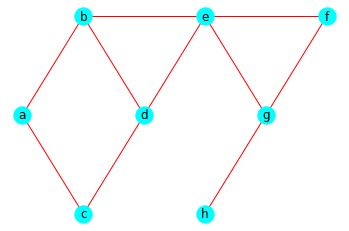

In [15]:
G = nx.DiGraph([("a","b"), ("a","c"), ("b","d"), ("c","d"),
                ("b","e"), ("d","e"), ("e","g"), ("e","f"),
                ("f","g"), ("g","h")])
G.nodes["a"]['pos'] = "0,10!"
G.nodes["b"]['pos'] = "10,20!"
G.nodes["c"]['pos'] = "10,0!"
G.nodes["d"]['pos'] = "20,10!"
G.nodes["e"]['pos'] = "30,20!"
G.nodes["f"]['pos'] = "50,20!"
G.nodes["g"]['pos'] = "40,10!"
G.nodes["h"]['pos'] = "30,0!"


pos = graphviz_layout(G)

plt.figure("cycle")
nx.draw_networkx_nodes(G, pos, node_color="cyan")
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows=False)
plt.box(False)
plt.show()

La méthode consiste à mémoriser les sommets voisins du sommet visité comme clés d’un dictionnaire et ayant pour valeur son parent (le sommet visité).  

Le sommet de départ n’aura bien entendu pas de parent (None).  

À la fin notre dictionnaire parents sera:  
```python
{’a’: None, ’b’: ’a’, ’c’: ’a’, ’d’: ’b’, ’e’: ’b’, ’f’: ’e’, ’g’: ’e’, ’h’: ’g’}
```
Il nous faudra lire ce dictionnaire pour pouvoir établir le chemin entre ’a’ et ’h’  

h a pour parent g qui a pour parent e qui a pour parent b qui a pour parent a.  

d’où le chemin : a - b - e - g - h

<center><b>L'algorithme du BFS modifié</b></center>

![bfs2](BFS2.jpg)

Cette fonction renvoie un dictionnaire qui contient les sommets visités(clés) et leurs parents (valeurs).  

Il faut maintenant exploiter ce dictionnaire pour faire afficher un chemin entre deux sommets. C’est ce que réalise cette fonction qui prend en paramètre l’arrivée et le dictionnaire parents.

In [16]:
def Solution(end, parents):
    chemin = []
    courant = end
    while courant is not None:
        chemin = [courant] + chemin
        courant = parents[courant]
    return chemin

### Exercice 4:  
Implémenter l'algorithme en python et la fonction Solution pour faire afficher un chemin entre les sommets b et h de notre graphe G.

### Exercice 5:  
Remplacer dans la fonction parcours_largeur la ligne  


**Si il n’est pas dans sommet_visite et pas dans la file alors**  
  
par la ligne  

**Si il n’est pas dans sommet_visite alors**  
  
Qu'en est-il des chemins proposés ?

### Exercice 6:  
Reprendre ce travail en utilisant la version récursive du BFS